# 로지스틱 회귀

## 로지스틱 회귀 

from sklearn.linear_model import LogisticRegression
- 파라미터 
    - penalty : 규제(Regularization) 유형 선택
        - l1
        - ㅣ2
        - elasticnet 
    - C : 규제 강도 조절하는 $ \lambda $ 의 역수 : $ 1 \over \lambda \;$  
        - $ 1 \over C $ Regularization
    - sover 
        - ‘newton-cg’ → L2, no penalty
        - ‘lbfgs’ → L2, no penalty
        - ‘sag’ → L2, no penalty, large datasets
        - __‘saga’ → L1, L2, elasticnet, no penalty,__ large datasets 
        - ‘liblinear’→L1 penalty, small datasets

### 로지스틱 회귀 평가지표 <=> 분류 평가 지표와 동일 

1. precision
2. recall
3. accuracy 
4. ROC-AUC 
5. PR-Curve

### 회귀를 통한 분류 방법

회귀함수 : $ \hat y = w_0 + {w_1}{x_1} + {w_2}{x_2} $

시그모이드 함수 : $ \hat y = { 1 \over { 1 + e^{-1} }} $

1. 구해진 회귀함수를 통해 나오는 결과값을 다시 Input으로 하여 시그모이드 함수를 이용
2. 시그모이드 함수의 결과값( greater than or equal to 0.5 / less than 0.5 )를 이용 분류


<img src = './img/05_로지스틱회귀1.jpg' >

### 로지스틱 회귀 분류 수행 절차
1. 선형회귀의 일종인 로지스틱회귀는 데이터의 정규분포도에 따라 예측 성능 영향을 받을 수 있으므로 
    - StandardStcaler 이용하여 표준 스케일링 
2. 테스트, 검증 세트 분리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

###### 표준 정규 분포를 따르는 분포로 스케일링 

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, 
                                                      test_size=0.3, random_state=0)

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


### 로지스틱 회귀 + Regularization ( L1, L2, Elasticnet ) 규제 
- solver 
    - ‘newton-cg’ → L2, no penalty
    - ‘lbfgs’ → L2, no penalty
    - ‘sag’ → L2, no penalty, large datasets
    - __‘saga’ → L1, L2, elasticnet, no penalty,__ large datasets 
    - ‘liblinear’→L1 penalty, small datasets

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
'''
 defalult:
 penalty='l2', 
 C=1.0
 solver = lbgfs
 
'''
lr_clf = LogisticRegression(n_jobs=-1) 
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


###### 파라미터 튜닝에 규제를 추가하여 cross validation을 통한 optimal parameter를 알아본다

In [20]:
from sklearn.model_selection import GridSearchCV

# TO-DO  
# solver 파라미터 선택 
# C 설정 
params={'solver' : ['saga'],
        'penalty':['l2', 'l1', 'elasticnet'],
        'C':[0.01, 0.02, 0.05, 0.1,0.3, 0.5, 0.8, 1,3, 5, 7, 10, 20]} # C = 1/alpha --> C가 클수록 alpha가 작아진다

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 Accuracy:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}, 최적 평균 Accuracy:0.979


/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 회귀 트리 
- from sklearn.ensemble import 
    - RandomForestRegressor /GradientBoostingRegressor 
    - XGBRegressor / LGBMRegressor / DecisionTreeRegressor 
- 파라미터 
    - max_depth

- 트리 기반의 회귀는 회귀 트리를 이용한다. 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 한다.
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분튜 트리는 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속하는 데이터 값의 평균값을 구해 회귀 예측값을 계산

###### 장단점
1. 다중선형회귀보다 해석이 어렵다.
2. f가 비선형적이고 복잡하다면 다중선형회귀보다는 나을 수 있다.
3. 더미변수를 만들지 않고 질적 변수를 쉽게 처리할 수 있다.
4. 다중회귀변수나 KNN분류에 비해 예측정확도가 좋지 못한다.
5. 상기 4번의 단점은 배깅, 랜덤포리스트, 부스팅과의 앙상블을 통해 예측성능을 향상 시킬 수 있다.

### CART(Classification And Regression Trees) : 분류 + 회귀 가능 알고리즘 

트리 생성은 CART 알고리즘에 기반
<img src = './img/05_로지스틱회귀_카트.jpg' width='80%' align='left'>

### 회귀트리 알고리즘 : 재귀 이진 분할 ( Recursive Binary Splitting ) - 참고.. 어려운 설명 

1. 설명 변수 공간, $ X_1, X_2,...,X_p $에 대한 가능한 값들의 집합을 $ R_1, R_2,...,R_j $로 분할   

2. 각 공간은 $ RSS = \sum_{j=1}^J\sum_{i\in{R_j}}(y_i - \hat y_{R_j})^2 $를 최소로 하는 공간 $ R_1, R_2,...,R_j $을 찾는다.   
( $ \hat y_{R_j} $은 $R_j$에 속하는 관측치들의 평균값 )

3. 이를 위해 $ X_j 의 절단점(cutpoint) s를 선택한다.

   $ R_1(j,s) = \{X|X_j < s\}와 \quad R_2(j,s) = \{X|X_j \ge s\}$로 분할하고 

   $ \quad \;\; \sum_{{i:x_i} \in {R_1(j,s)}}(y_i - \hat y_{R_1})^2 + \sum_{{i:x_i} \in {R_2(j,s)}}(y_i - \hat y_{R_2})^2 $를 최소로 하는 j와 s를 찾는다

$\quad$ 각 $R_j$에 속하는 모든 관측치들의 평균값에 대해, 해당 영역에 있는 값들은 이 평균값으로 예측 한다 

4. 각 영역에서 전체 설명변수 공간을 분할하는 대신, 앞 과정에서 분할된 두 영역 중 한 영역을 선택하여 분할

5. 위의 과정을 어떤 정지기준(stopping criteriom)이 만족될 때까지 반복

6. 이 과정에서 비용 복잡성 pruning을 통해 과적합을 방지한다. 이 방법은 아주 큰 트리 T0를 만들고 그것을 prune하여 서브트리를 얻는다.  
   이 과정에서 가장 낮은 검정 오차율(RSS)를 주는 트리를 선택한다. 

   
7. 아래의 식을 교차검증을 이용하여 $\alpha$의 함수로 서브트리들의 시퀀스를 얻고, 전체 자료에 대해 $\alpha$에 대응하는 서브트리를 얻는다.    
( |T|는 트리T의 터미널 노드 수를 의미 )
<img src = './img/05_회귀트리_pruning.jpg' >

최종적인 트리 Guideline은 재귀이진분할 + 비용 복잡성 pruing + 교차검증로 요약할 수 있다. 상세 과정은 다음과 같다.

   
Step 1: 훈련셋을 재귀이진분할하여 전체 트리를 만든다. 각 트리내 데이터 수가 특정 값보다 작을 경우 분할을 중지한다.   

Step 2: 만들어 놓은 트리별로 비용 복잡성 pruning식을 적용해 가장 좋은 서브트리들을 알파의 함수로 얻는다.  
           (예: 특정 설명변수와 그것의 기준 값 s, 서브트리 갯수 T개로 구성될 때의 알파값) 

Step 3: k-folds 교차검증을 통해 위의 알파값을 선택한다. 1) 훈련셋의 k번째 fold외 다른 데이터를 가지고 상기 1,2번을 한다. 
        이때 k는 훈련셋 데이터수의 약수로 한다.(예: 132개면 6 folds 적용) 2) 남겨진 k번째 fold 데이터에 대해 평균제곱예측오차를 
        알파의 함수로 구하고 각 테스트 fold별로 알파값을 평균하여 평균제곱예측오차를 최소하는 알파를 선택한다. 

Step 4: 선택된 알파에 대응하는 위 2번째 단계에서 얻은 서브트리를 반환한다.  

Step 5: 최종 트리를 검정셋에 적용해 MSE를 구한다.  

실제 아래에서 제시할 예는 Step 1 –> Step 3 –> Step 4 –> Step 5처럼 보인다. Step 2는 실질적으로 Step 3 전에 수행하나 굳이 할 필요 없으며  Step 4는 실제로 Step 2를 의미하기 때문이다.
트리 빌딩은 교차검증을 통해 트리의 갯수(터미널 노드수) 먼저 확정하고 (Step 3) 확정된 트리의 갯수에 해당하는 최적화된 tree를 구하는 점(Step 4)에서 다중회귀모델의 변수 선택 방법과 유사하다.

### 회귀트리 알고리즘 : 초등학생도 이해할 수 있는 설명 

__각 단계별로 SSE이 크도록 트리를 나눔__

<img src = './img/05_회귀트리_알고리즘2.jpg' >

### 평가지표 : 회귀와 동일 ( MSE, RMSE, R2.... )

###### RandomForestRegressor를 이용한 회귀 트리

In [29]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.420 


In [30]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.420 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
[00:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:13:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:13:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:13:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:13:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


###### 회귀 트리 -> coef_ 속성 대신 feature_importances 

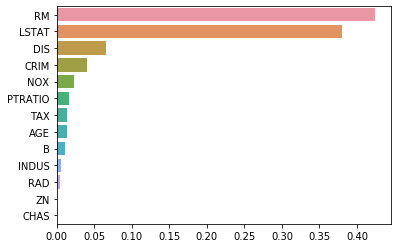

In [32]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

## 회귀 트리 생성 과정 시각화 

(100, 2)


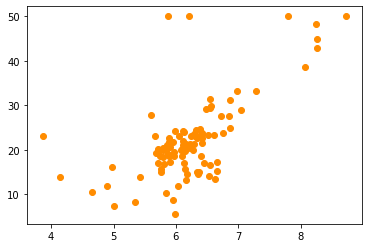

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


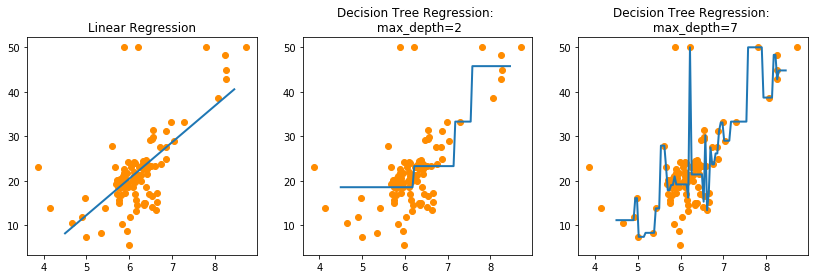

In [37]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

In [62]:
from sklearn.tree import export_graphviz  
  
export_graphviz(rf_reg2, out_file ='rf_reg2.dot', 
               feature_names =['RM'],
               class_names=['PRICE']) 

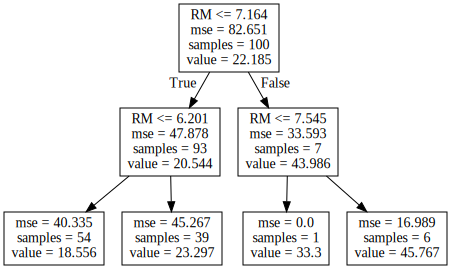

In [63]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
# depth = 2 회귀 트리 
with open("rf_reg2.dot") as f:
    dot_graph1 = f.read()
graphviz.Source(dot_graph1)

In [64]:
export_graphviz(rf_reg7, out_file ='rf_reg7.dot', 
               feature_names =['RM'],
               class_names=['PRICE']) 

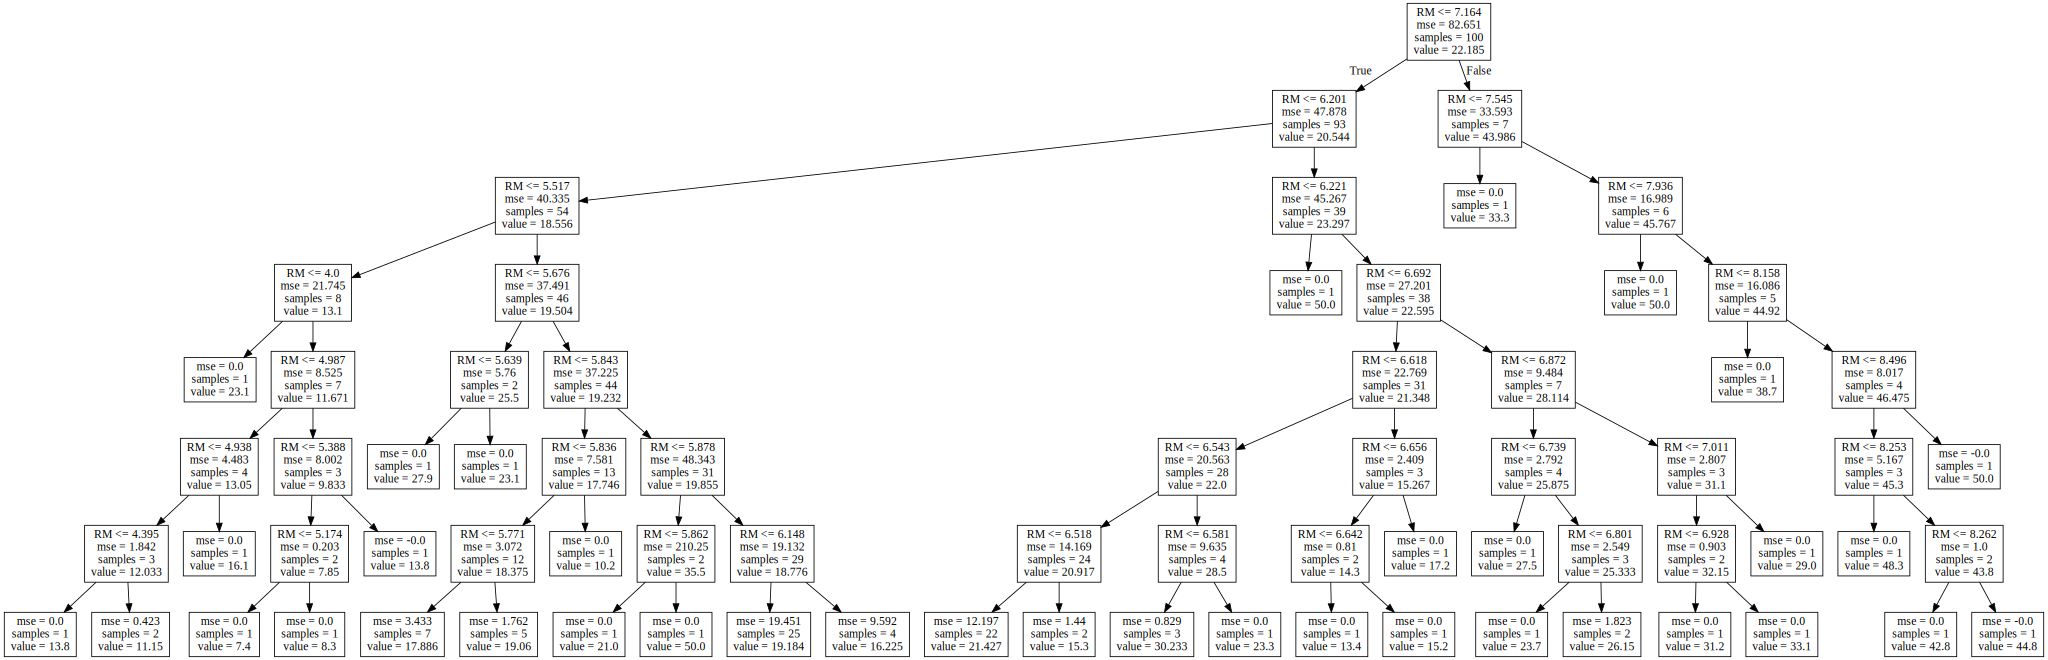

In [61]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
# depth = 7 회귀 트리 
with open("rf_reg7.dot") as f:
    dot_graph2 = f.read()
graphviz.Source(dot_graph2)